# Conheça melhor seus clientes utilizando RFM

## Aprenda como segmentar seus clientes com apenas três indicadores: recência, frequência e valor monetário.

Nesse artigo vou mostrar como criar um modelo RFM para chamar de seu, e ensinar como implementar o modelo com poucas linhas de código em Python. 

## Por que você faria uma análise RFM?

A segmentação RFM fará você entender melhor a sua base de clientes, por ser uma análise mais simples é uma ótima forma de começar com a análise de dados, e caso exista interesse da sua parte, pode ser aprofundada com técnicas e modelos mais avançados. 

Com o RFM você estará apto a responder perguntas de negócio como:

* Quem são os melhores clientes?
* Quais clientes estão deixando de comprar?
* Quais são os clientes mais leais?
* Quais clientes têm mais chances de comprar mais? 
* Quem são os clientes que não compram mais?
* Quem são os clientes que não posso perder de jeito nenhum?
* Quais clientes são mais suscetíveis a aceitar uma promoção?

## Prazer, RFM
RFM é um método estatístico simples utilizado para categorizar clientes baseados em seus hábitos de compra. Os hábitos são identificados através de três informações: recência (R), que para esse artigo vamos utilizar o número de dias desde a última compra do cliente, a frequência (F) em número vezes que o cliente fez uma compra e o valor monetário (M), que significa o valor entregue pelo cliente, para essa análise será a quantia total gasta pelo cliente durante o período analisado. Após estarmos com esses indicadores, vamos poder segmentar os clientes em grupos, que são:

* Campeões: Compraram recentemente, além de comprar com frequência e gastam muito.
* Clientes leais: Compradores recorrentes.
* Lealdade potencial: São clientes novos que compram com frequência.
* Novos Clientes: Compraram recentemente, mas não com frequência.
* Promissores: Compradores recentes, mas que não gastaram muito
* Em risco: Clientes que possuem uma frequência e valor monetário acima da média mas faz algum tempo que não compram, precisam ser trazidos de volta.
* Não posso perdê-los: São clientes que compravam com frequência e gastavam bastante, mas por algum motivo, não compram há algum tempo.
* Precisam de atenção: Estão na média da recência, frequência e valor monetário, talvez não comprem já a algum tempo.
* Prestes a hibernar: Abaixo da média de recência e frequência. Se nada for feito, muito provavelmente serão perdidos.
* Hibernando: Sua última compra já faz um tempo e foram poucas as vezes em que comprou, provavelmente será perdido em breve.
* Perdido: Já não compram mais há muito tempo, além de não terem consumido muito ou frequentado outras vezes. 






A segmentação RFM fará você entender melhor a sua base de clientes, por ser uma análise mais simples é uma ótima forma de começar com a análise de dados, e caso exista interesse da sua parte, pode ser aprofundada com técnicas e modelos mais avançados. 

Com o RFM você estará apto a responder perguntas de negócio como:

* Quem são os melhores clientes?
* Quais clientes estão deixando de comprar?
* Quais são os clientes mais leais?
* Quais clientes têm mais chances de comprar mais? 
* Quem são os clientes que não compram mais?
* Quem são os clientes que não posso perder de jeito nenhum?
* Quais clientes são mais suscetíveis a aceitar uma promoção?



In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


In [2]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df=df[['ID','Recency','MntWines','MntFruits','MntMeatProducts',
       'MntSweetProducts','MntFishProducts','MntGoldProds',
       'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
df.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntSweetProducts,MntFishProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,58,635,88,546,88,172,88,8,10,4
1,2174,38,11,1,6,1,2,6,1,1,2
2,4141,26,426,49,127,21,111,42,8,2,10
3,6182,26,11,4,20,3,10,5,2,0,4
4,5324,94,173,43,118,27,46,15,5,3,6


In [5]:
#somando o número de compras em diferentes situações para encontrar a Frequência
df['Frequency'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + 
                           df['NumStorePurchases'])

In [6]:
#somando todos os gastos em uma só coluna para encontrar o valor monetário
df['MonetaryValue'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] 
                       + df['MntFishProducts'] + df['MntSweetProducts'] 
                       + df['MntGoldProds'])

In [7]:
RFM = df[['ID', 'Recency', 'Frequency', 'MonetaryValue']]
RFM

,ID,Recency,Frequency,MonetaryValue
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2235,10870,46,16,1341
2236,4001,56,15,444
2237,7270,91,18,1241
2238,8235,8,21,843


<AxesSubplot:xlabel='Recency', ylabel='Density'>

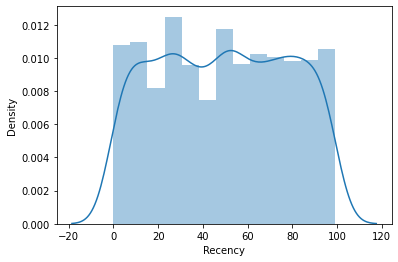

In [8]:
sns.distplot(RFM['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

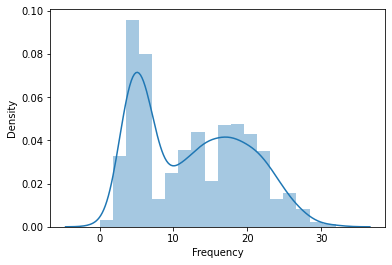

In [9]:
sns.distplot(RFM['Frequency'])

<AxesSubplot:xlabel='MonetaryValue', ylabel='Density'>

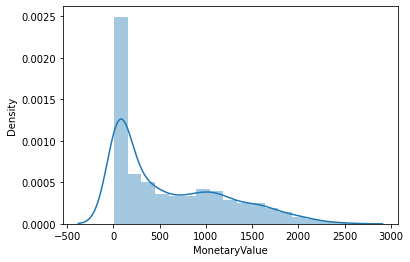

In [10]:
sns.distplot(RFM['MonetaryValue'])

In [11]:
#Criando os rotulos
r_labels = range(5, 0, -1)
f_labels = range(1,6)
m_labels = range(1,6)

#Separando os dados 
r_quartiles = pd.qcut(RFM['Recency'], 5, labels=r_labels)
f_quartiles = pd.qcut(RFM['Frequency'], q=5, labels=f_labels)
m_quartiles = pd.qcut(RFM['MonetaryValue'], q=5, labels=m_labels)

#Atribuindo os novos rotulos
RFM = RFM.assign(R = r_quartiles, F=f_quartiles.values, M=m_quartiles.values)
RFM

,ID,Recency,Frequency,MonetaryValue,R,F,M
0,5524,58,22,1617,3,5,5
1,2174,38,4,27,4,1,1
2,4141,26,20,776,4,4,4
3,6182,26,6,53,4,2,1
4,5324,94,14,422,1,3,3
...,...,...,...,...,...,...,...
2235,10870,46,16,1341,3,4,5
2236,4001,56,15,444,3,3,3
2237,7270,91,18,1241,1,4,5
2238,8235,8,21,843,5,5,4


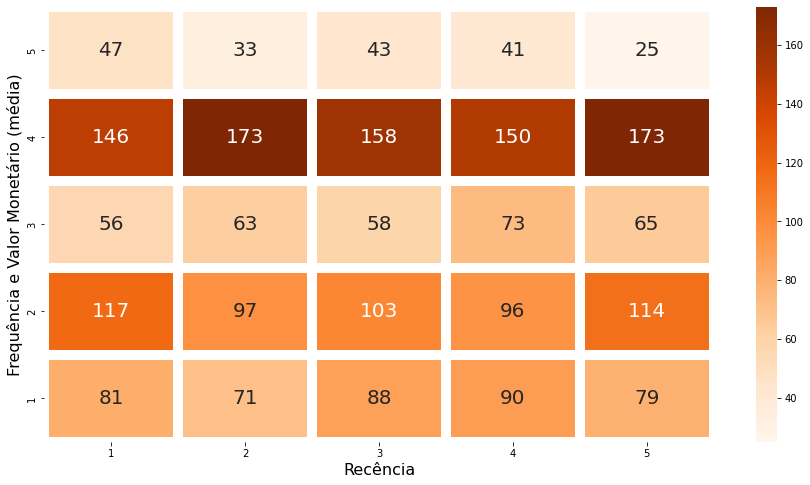

In [12]:
#Média de F+M
RFM['FM_mean'] = round( ( (RFM[ ['F','M'] ].sum(axis=1) ) / 2 ), 0 )

#Pivotando a tabela
RFMpivot = RFM.pivot_table(values='ID', index='FM_mean', columns='R', aggfunc='count')
RFMpivot = RFMpivot.loc[[5,4,3,2,1],[1,2,3,4,5]]

#Visualizando em um mapa de calor
plt.figure(figsize=(15,8))
plot = sns.heatmap(RFMpivot, annot=True, fmt='d', linewidths=10, 
            cmap='Oranges', annot_kws={"fontsize":20})
plot.set_xlabel('Recência', fontsize=16)
plot.set_ylabel('Frequência e Valor Monetário (média)', fontsize=16)
plt.show()

In [13]:
#Vamos descobrir agora a quem se pertence a cada grupo

RFM['R'] = RFM['R'].astype('int64')
RFM['FM_mean'] = RFM['FM_mean'].astype('int64')

#Irei atribuir os mesmos rótulos da imagem
def classificar(df):
    if (df['FM_mean'] == 5) and (df['R'] == 1):
      return 'Não posso perde-los'
    elif (df['FM_mean'] == 5) and (df['R'] == 2):
      return 'Em risco'
    elif (df['FM_mean'] == 4) and (df['R'] == 1):
      return 'Em risco'
    elif (df['FM_mean'] == 4) and (df['R'] == 2):
      return 'Em risco'
    elif (df['FM_mean'] == 3) and (df['R'] == 1):
      return 'Em risco'
    elif (df['FM_mean'] == 3) and (df['R'] == 2):
      return 'Em risco'
    elif (df['FM_mean'] == 5) and (df['R'] == 3):
      return 'Clientes leais'
    elif (df['FM_mean'] == 5) and (df['R'] == 4):
      return 'Clientes leais'
    elif (df['FM_mean'] == 4) and (df['R'] == 3):
      return 'Clientes leais'
    elif (df['FM_mean'] == 4) and (df['R'] == 4):
      return 'Clientes leais'
    elif (df['FM_mean'] == 4) and (df['R'] == 5):
      return 'Clientes leais'
    elif (df['FM_mean'] == 5) and (df['R'] == 5):
      return 'Campeões'
    elif (df['FM_mean'] == 3) and (df['R'] == 3):
      return 'Precisam de atenção'
    elif (df['FM_mean'] == 3) and (df['R'] >= 4):
      return 'Lealdade potêncial'
    elif (df['FM_mean'] == 2) and (df['R'] >= 4):
      return 'Lealdade potêncial'
    elif (df['FM_mean'] == 1) and (df['R'] <= 2):
      return 'Perdidos'
    elif (df['FM_mean'] == 2) and (df['R'] == 1):
      return 'Perdidos'
    elif (df['FM_mean'] == 2) and (df['R'] == 2):
      return 'Hibernando'
    elif (df['FM_mean'] <= 2) and (df['R'] == 3):
      return 'Prestes a hibernar'
    elif (df['FM_mean'] == 1) and (df['R'] == 4):
      return 'Promissor'
    else:
      return 'Recentes'

RFM['Classe'] = RFM.apply(classificar,axis=1)
RFM.value_counts('Classe')

Classe
Clientes leais         565
Em risco               471
Lealdade potêncial     348
Perdidos               269
Prestes a hibernar     191
Hibernando              97
Promissor               90
Recentes                79
Precisam de atenção     58
Não posso perde-los     47
Campeões                25
dtype: int64

Text(0.5, 0, 'Classes')

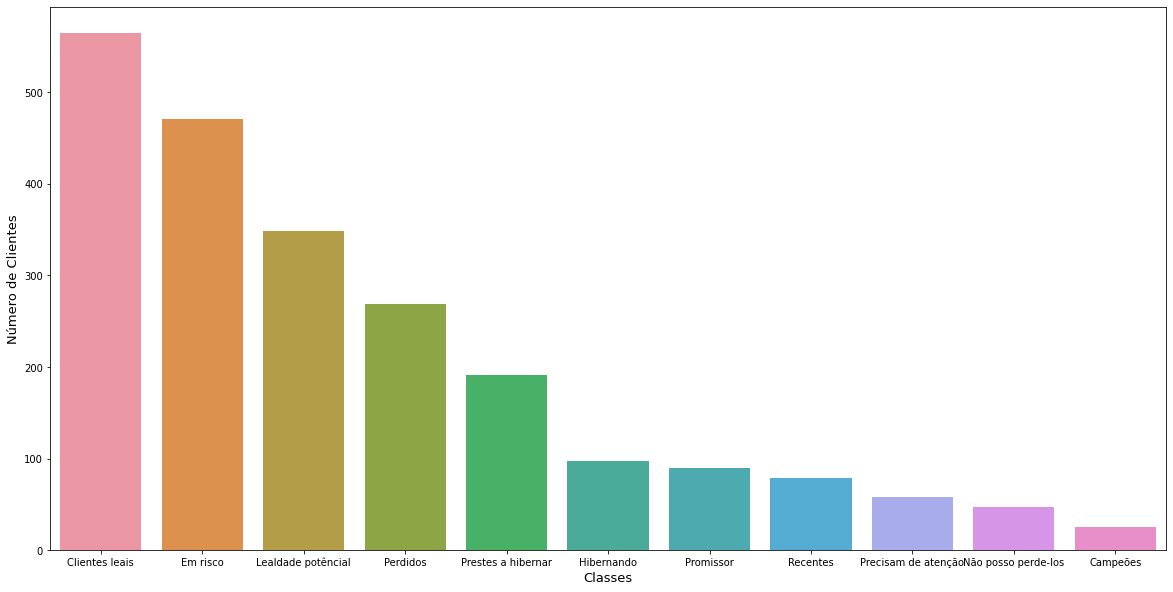

In [14]:
ord_rfm = RFM.groupby('Classe').agg('count').sort_values(by='ID',
                                                         ascending=False).index
plt.figure(figsize=(20,10))
ax = sns.countplot(x=RFM["Classe"], data=RFM, label=ord_rfm, order=ord_rfm)
plt.ylabel("Número de Clientes", fontsize=13)
plt.xlabel("Classes", fontsize=13)